# Classificação de Grãos de Trigo – Análise e Modelagem

Neste notebook vamos trabalhar com um conjunto de dados contendo **210 amostras** de grãos de trigo, pertencentes a **três variedades**:

- **Kama**
- **Rosa**
- **Canadian**

Cada amostra possui as seguintes características:

1. **Área** – medida da área do grão.
2. **Perímetro** – comprimento do contorno do grão.
3. **Compacidade** – medida derivada da forma do grão.
4. **Comprimento do Núcleo (length_kernel)** – eixo principal da elipse equivalente ao grão.
5. **Largura do Núcleo (width_kernel)** – eixo secundário da elipse.
6. **Coeficiente de Assimetria (asymmetry_coefficient)** – medida de assimetria do grão.
7. **Comprimento do Sulco do Núcleo (length_groove)** – comprimento do sulco central do grão.
8. **Classe** – rótulo da variedade do trigo (1 = Kama, 2 = Rosa, 3 = Canadian).

Nas próximas etapas iremos:
- Fazer **análise exploratória** e **pré-processamento** dos dados;
- Construir **modelos de classificação** com diferentes algoritmos;
- Realizar **otimização de hiperparâmetros** (Grid Search);
- **Interpretar os resultados** e extrair insights sobre o problema.


In [1]:
# ===== IMPORTAÇÕES BÁSICAS =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mostrar gráficos dentro do notebook
%matplotlib inline

# Configurações estéticas
sns.set(style="whitegrid", context="notebook")

# ===== CARREGAR O CONJUNTO DE DADOS =====
# Espera-se que o arquivo seeds_dataset.txt esteja no mesmo diretório do notebook
file_path = "seeds_dataset.txt"

# O arquivo é separado por espaços/brancos, sem cabeçalho
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Definir nomes das colunas
df.columns = [
    "area",
    "perimeter",
    "compactness",
    "length_kernel",
    "width_kernel",
    "asymmetry_coefficient",
    "length_groove",
    "class"
]

# Mapear a classe numérica para o nome da variedade
class_mapping = {1: "Kama", 2: "Rosa", 3: "Canadian"}
df["class_name"] = df["class"].map(class_mapping)

# Visualizar as primeiras linhas
df.head()


/tmp/ipython-input-1803349722.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coefficient,length_groove,class,class_name
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama


## 1. Estrutura básica dos dados

Nesta seção vamos:
- Verificar o número de linhas e colunas;
- Conferir os tipos de dados;
- Ver quantas amostras existem por classe.


In [2]:
# Dimensão do dataset
print("Dimensão do dataset:", df.shape)

# Tipos de dados
print("\nTipos de dados:")
print(df.dtypes)

# Contagem de amostras por classe
print("\nContagem de amostras por classe (numérica):")
print(df["class"].value_counts())

print("\nContagem de amostras por variedade:")
print(df["class_name"].value_counts())


Dimensão do dataset: (210, 9)

Tipos de dados:
area                     float64
perimeter                float64
compactness              float64
length_kernel            float64
width_kernel             float64
asymmetry_coefficient    float64
length_groove            float64
class                      int64
class_name                object
dtype: object

Contagem de amostras por classe (numérica):
class
1    70
2    70
3    70
Name: count, dtype: int64

Contagem de amostras por variedade:
class_name
Kama        70
Rosa        70
Canadian    70
Name: count, dtype: int64


## 2. Estatísticas descritivas

Aqui calculamos estatísticas como:
- média
- mediana
- desvio padrão

para cada uma das características numéricas.


In [3]:
# Estatísticas padrão (count, mean, std, min, quartis, max)
df.describe()


,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coefficient,length_groove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [4]:
# Medianas de cada atributo numérico
df.median(numeric_only=True)


,0
area,14.35500
perimeter,14.32000
compactness,0.87345
length_kernel,5.52350
width_kernel,3.23700
asymmetry_coefficient,3.59900
length_groove,5.22300
class,2.00000


In [5]:
# Desvio padrão de cada atributo numérico
df.std(numeric_only=True)


,0
area,2.909699
perimeter,1.305959
compactness,0.023629
length_kernel,0.443063
width_kernel,0.377714
asymmetry_coefficient,1.503557
length_groove,0.491480
class,0.818448


## 3. Distribuição das características

Vamos visualizar:
- **Histogramas**, para entender a distribuição de cada atributo;
- **Boxplots**, para verificar a presença de *outliers*.


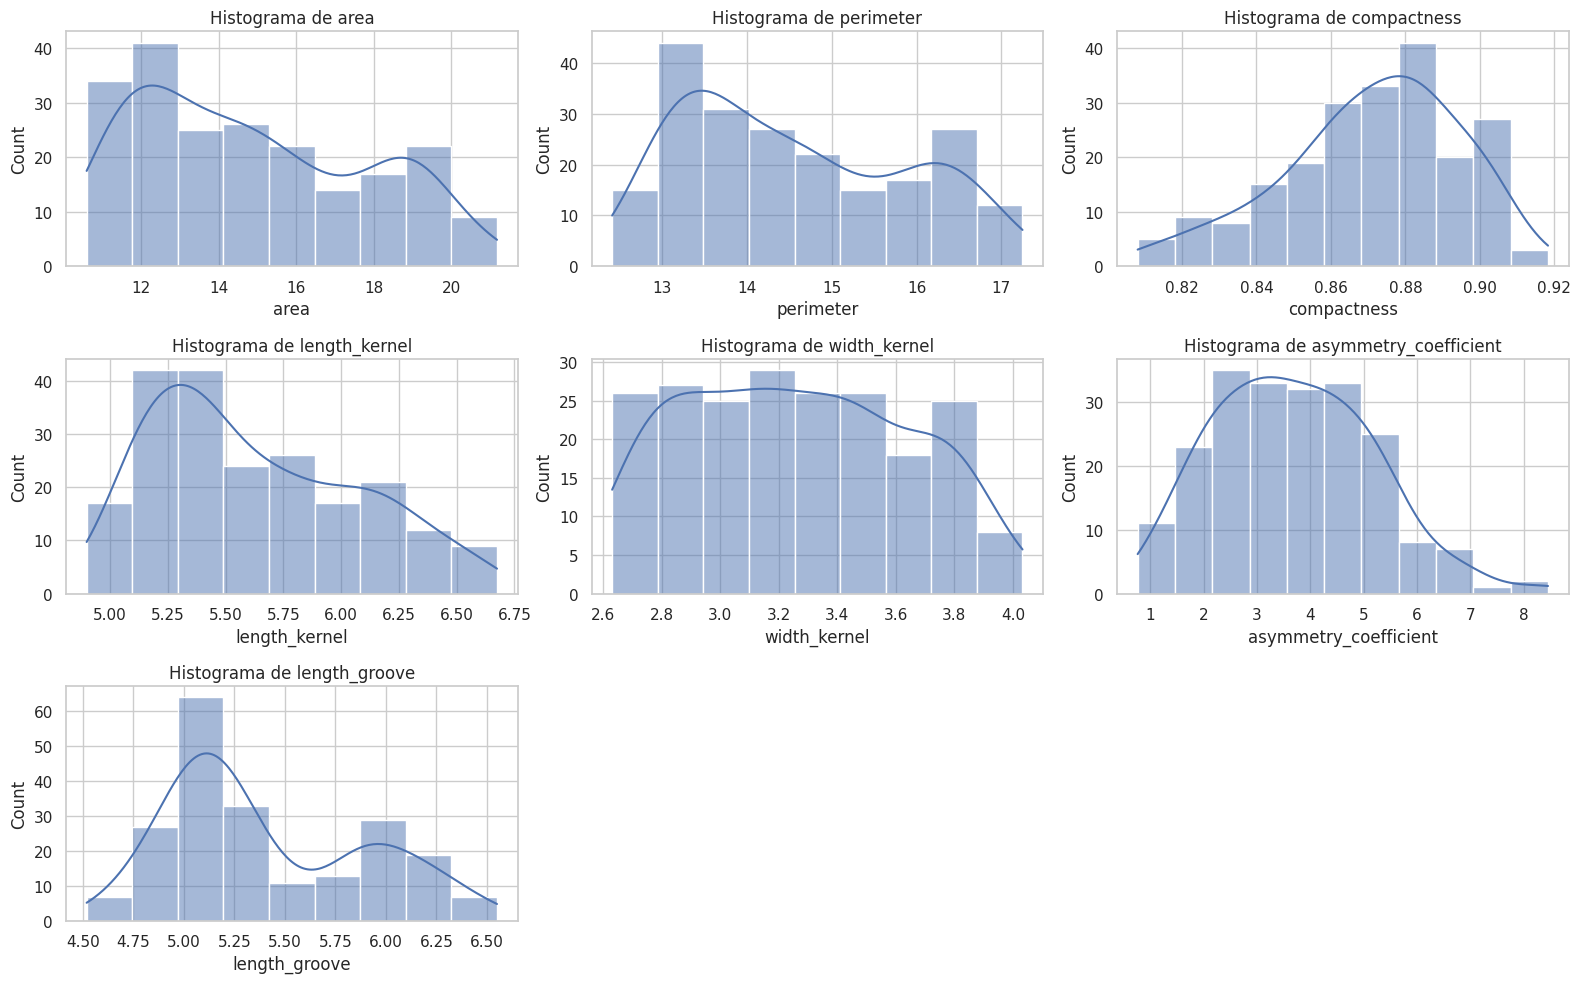

In [6]:
numerical_cols = [
    "area",
    "perimeter",
    "compactness",
    "length_kernel",
    "width_kernel",
    "asymmetry_coefficient",
    "length_groove"
]

plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histograma de {col}")
plt.tight_layout()
plt.show()


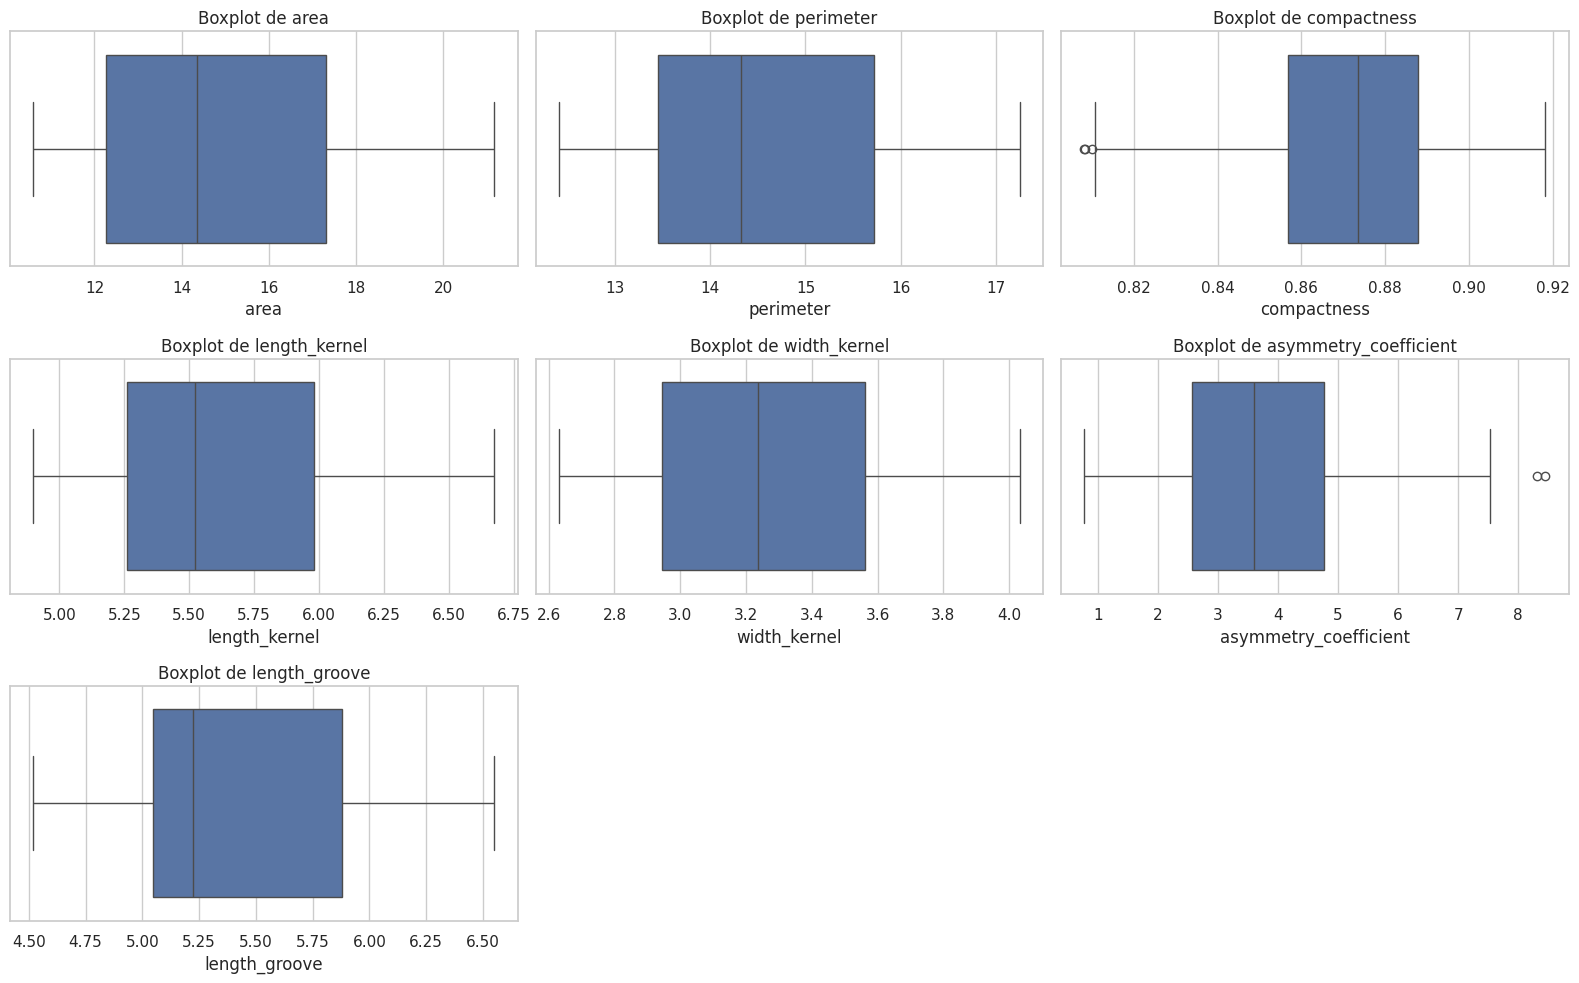

In [7]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()


## 4. Relações entre as características

Para entender como os atributos se relacionam entre si, vamos:
- Construir um **pairplot** colorido pela classe;
- Calcular a **matriz de correlação** entre as variáveis numéricas.


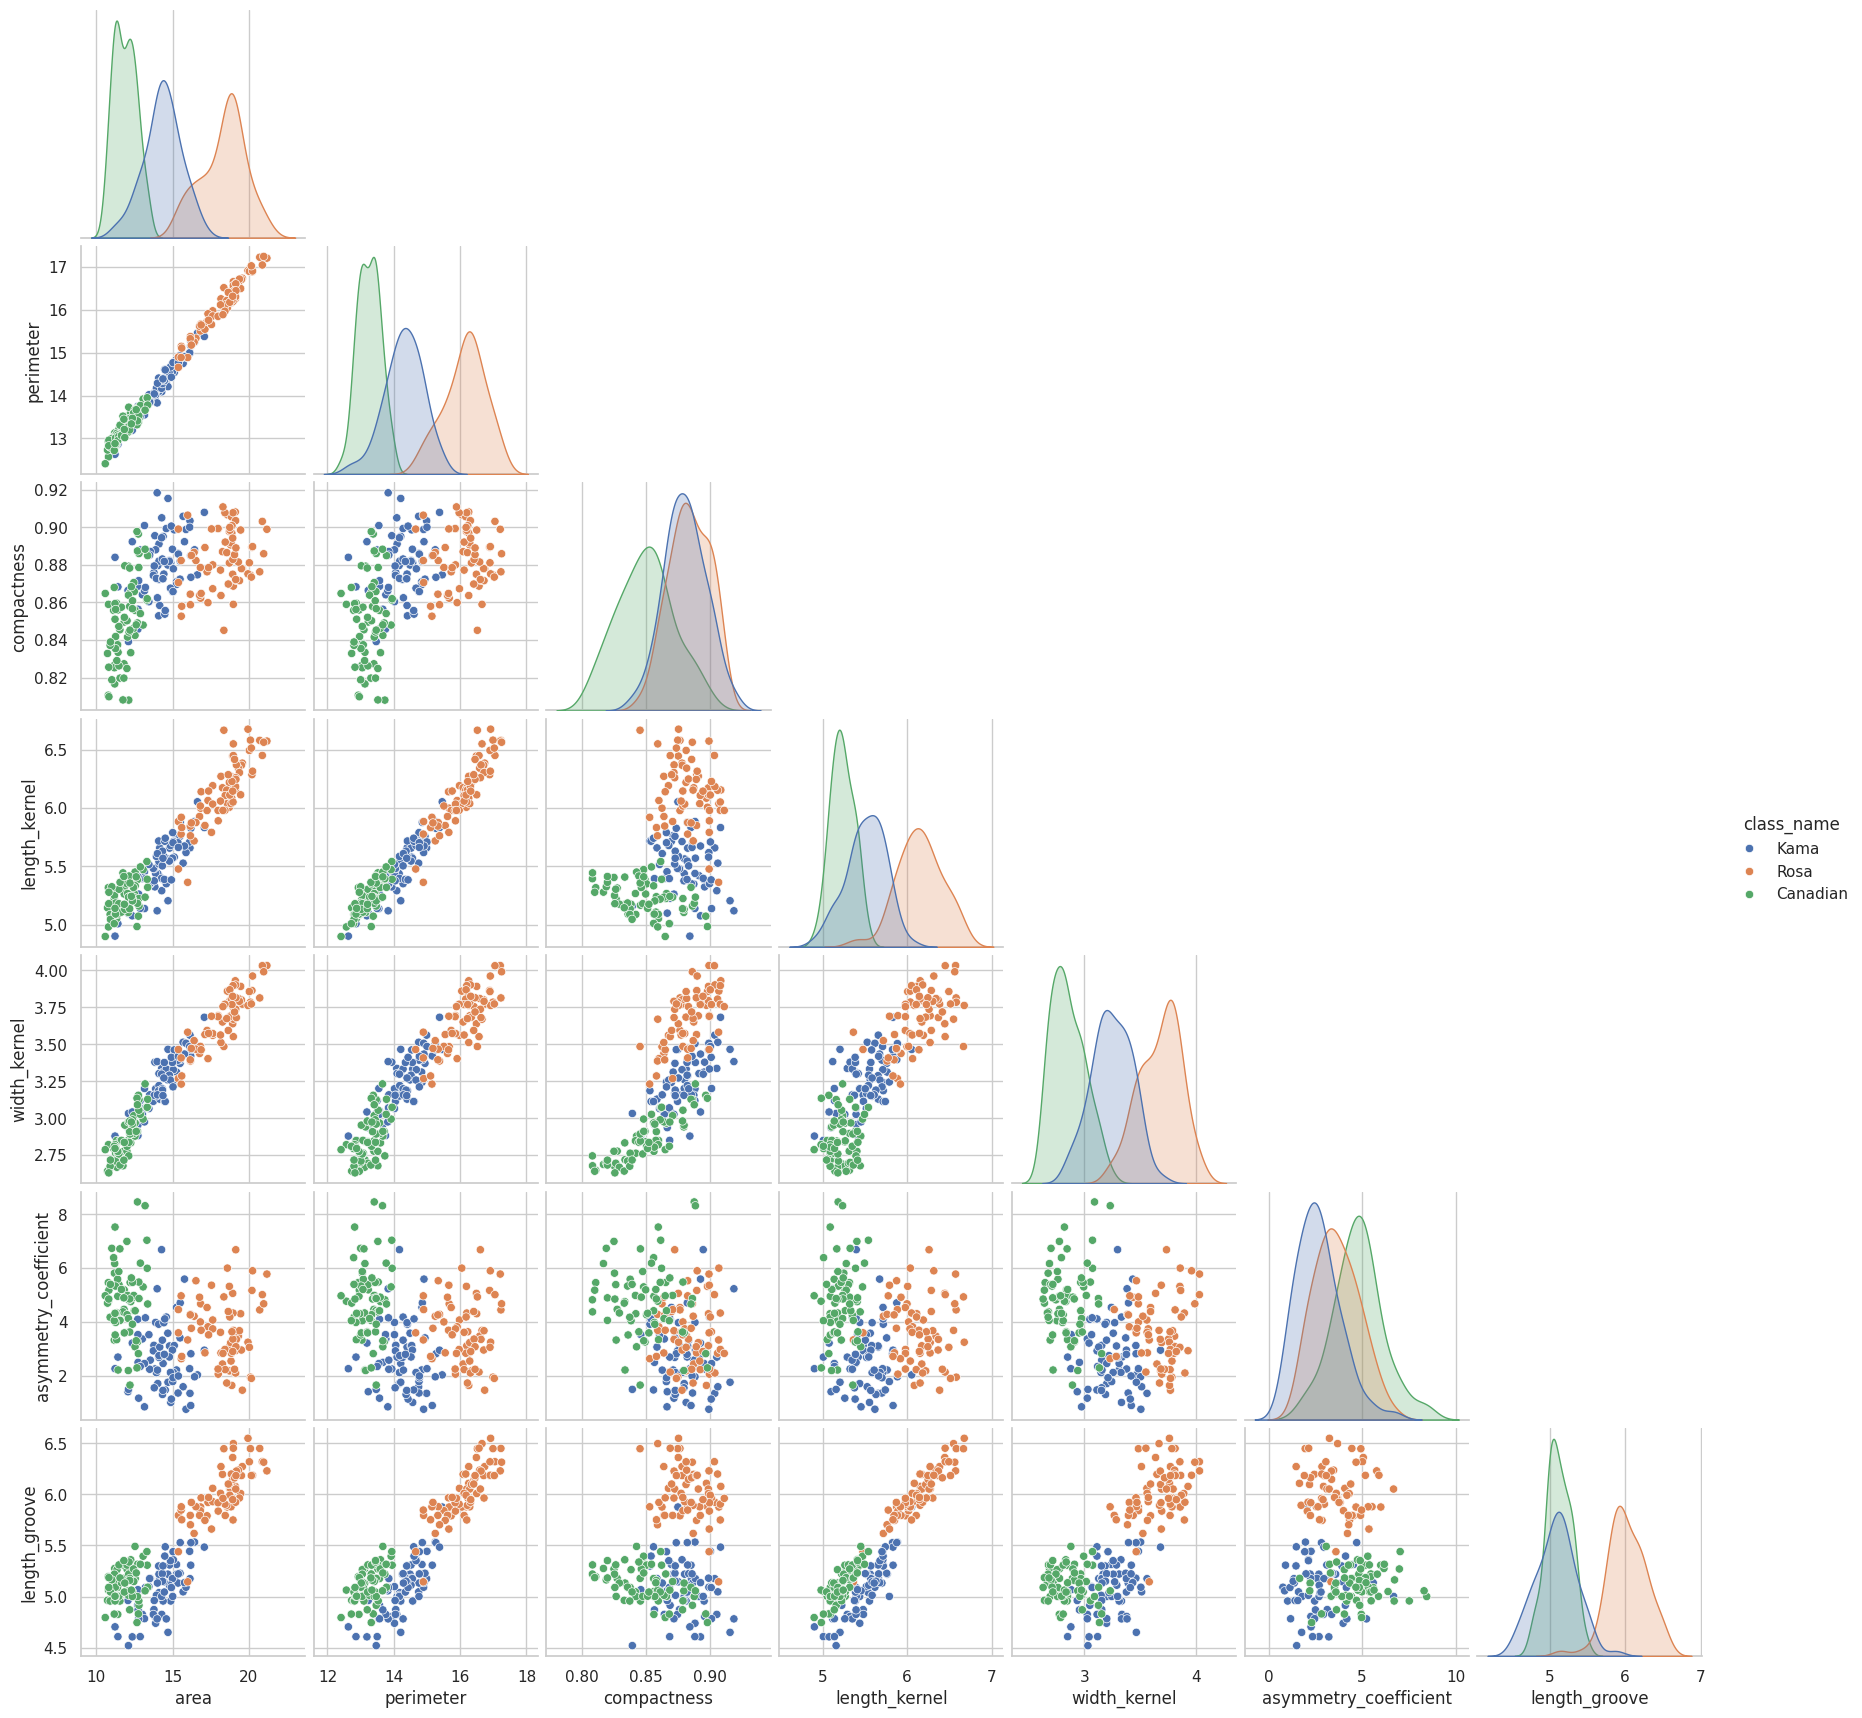

In [8]:
# Pairplot com cores por classe
sns.pairplot(df[numerical_cols + ["class_name"]], hue="class_name", corner=True)
plt.show()


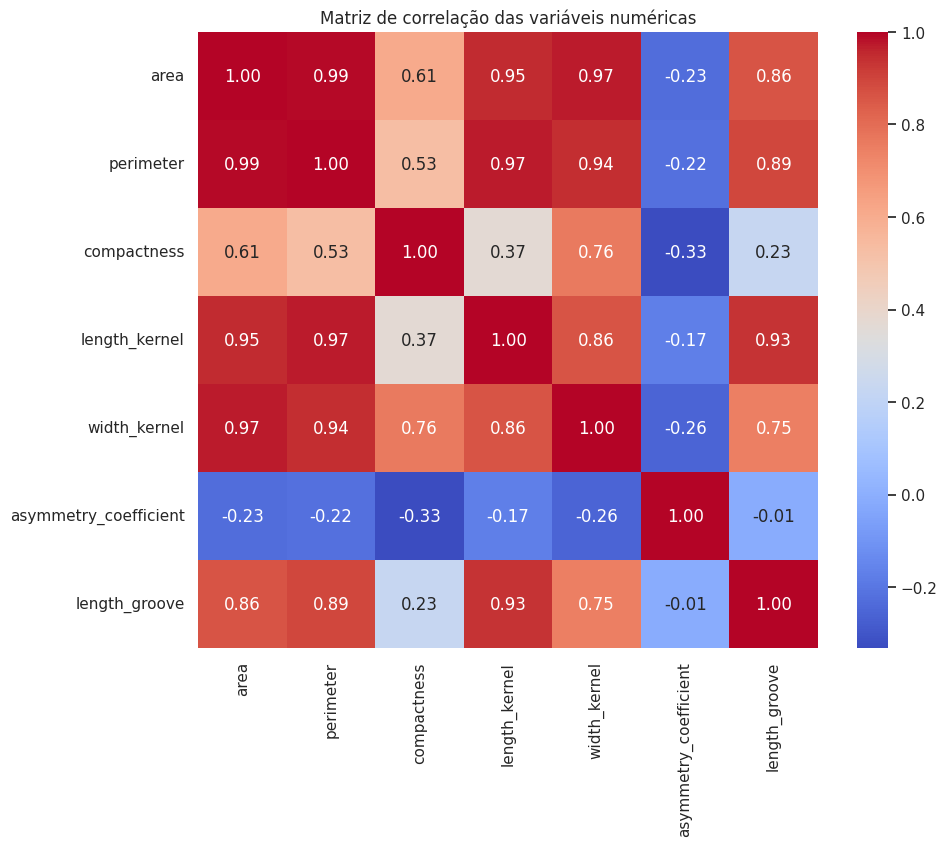

In [9]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlação das variáveis numéricas")
plt.show()


## 5. Valores ausentes e necessidade de escala

Antes de treinar os modelos, verificamos:

1. **Valores ausentes (NaN)** – para decidir se será necessário imputar ou remover linhas.
2. **Escala das variáveis** – como os atributos estão em escalas diferentes, é recomendável aplicar
   **padronização (StandardScaler)** antes de certos algoritmos (KNN, SVM, Regressão Logística).


In [10]:
# Verificando valores ausentes
df.isna().sum()


,0
area,0
perimeter,0
compactness,0
length_kernel,0
width_kernel,0
asymmetry_coefficient,0
length_groove,0
class,0
class_name,0


In [11]:
# Remover linhas com valores ausentes (caso existam)
df_clean = df.dropna().copy()
print("Dimensão após remoção de NaN:", df_clean.shape)


Dimensão após remoção de NaN: (210, 9)


In [12]:
df_clean = df.copy()


In [13]:
from sklearn.preprocessing import StandardScaler

# Features (X) e alvo (y)
X = df_clean[numerical_cols].values
y = df_clean["class"].values  # classes 1, 2, 3

# Padronização (média=0, desvio padrão=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape de X_scaled:", X_scaled.shape)


Shape de X_scaled: (210, 7)


# 2. Modelagem de Classificação

Agora vamos:

1. Separar o conjunto em **treino** e **teste** (70% / 30%);
2. Treinar diferentes algoritmos de classificação:
   - K-Nearest Neighbors (KNN)
   - Support Vector Machine (SVM – kernel RBF)
   - Random Forest
   - Regressão Logística
   - Naive Bayes
3. Avaliar os modelos com as métricas:
   - **Acurácia**
   - **Precisão (macro)**
   - **Recall (macro)**
   - **F1-score (macro)**
   - **Matriz de confusão**


In [14]:
from sklearn.model_selection import train_test_split

# Separar treino e teste (com estratificação para manter proporção das classes)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Tamanho treino:", X_train.shape[0])
print("Tamanho teste:", X_test.shape[0])


Tamanho treino: 147
Tamanho teste: 63


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Dicionário de modelos
models = {
    "KNN": KNeighborsClassifier(),
    "SVM (RBF)": SVC(kernel="rbf", probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB()
}

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    """
    Treina o modelo, faz previsões e imprime métricas de avaliação.
    Retorna um dicionário com as métricas principais.
    """
    # Treino
    model.fit(X_train, y_train)

    # Previsões
    y_pred = model.predict(X_test)

    # Métricas
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    rec  = recall_score(y_test, y_pred, average="macro")
    f1   = f1_score(y_test, y_pred, average="macro")

    print(f"\n=== Modelo: {name} ===")
    print(f"Acurácia:       {acc:.4f}")
    print(f"Precisão macro: {prec:.4f}")
    print(f"Recall macro:   {rec:.4f}")
    print(f"F1-score macro: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["Kama", "Rosa", "Canadian"]))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Kama", "Rosa", "Canadian"],
                yticklabels=["Kama", "Rosa", "Canadian"])
    plt.title(f"Matriz de Confusão - {name}")
    plt.xlabel("Classe Predita")
    plt.ylabel("Classe Verdadeira")
    plt.tight_layout()
    plt.show()

    return {
        "model": model,
        "accuracy": acc,
        "precision_macro": prec,
        "recall_macro": rec,
        "f1_macro": f1
    }



=== Modelo: KNN ===
Acurácia:       0.8730
Precisão macro: 0.8721
Recall macro:   0.8730
F1-score macro: 0.8713

Classification Report:
              precision    recall  f1-score   support

        Kama       0.84      0.76      0.80        21
        Rosa       0.90      0.90      0.90        21
    Canadian       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



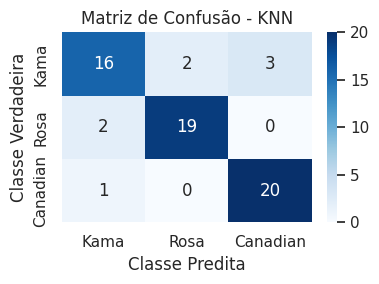


=== Modelo: SVM (RBF) ===
Acurácia:       0.8730
Precisão macro: 0.8721
Recall macro:   0.8730
F1-score macro: 0.8713

Classification Report:
              precision    recall  f1-score   support

        Kama       0.84      0.76      0.80        21
        Rosa       0.90      0.90      0.90        21
    Canadian       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



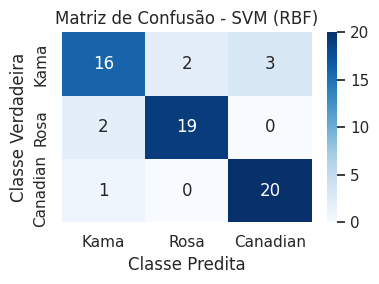


=== Modelo: Random Forest ===
Acurácia:       0.9206
Precisão macro: 0.9239
Recall macro:   0.9206
F1-score macro: 0.9192

Classification Report:
              precision    recall  f1-score   support

        Kama       0.94      0.81      0.87        21
        Rosa       0.95      0.95      0.95        21
    Canadian       0.88      1.00      0.93        21

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



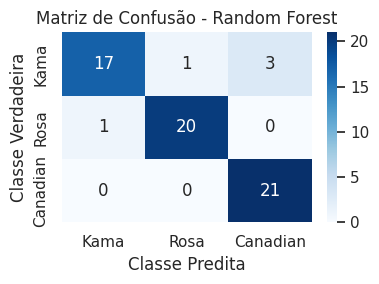


=== Modelo: Logistic Regression ===
Acurácia:       0.8571
Precisão macro: 0.8571
Recall macro:   0.8571
F1-score macro: 0.8543

Classification Report:
              precision    recall  f1-score   support

        Kama       0.83      0.71      0.77        21
        Rosa       0.90      0.90      0.90        21
    Canadian       0.83      0.95      0.89        21

    accuracy                           0.86        63
   macro avg       0.86      0.86      0.85        63
weighted avg       0.86      0.86      0.85        63



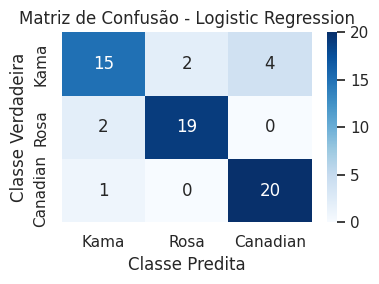


=== Modelo: Naive Bayes ===
Acurácia:       0.8254
Precisão macro: 0.8339
Recall macro:   0.8254
F1-score macro: 0.8251

Classification Report:
              precision    recall  f1-score   support

        Kama       0.73      0.76      0.74        21
        Rosa       0.94      0.76      0.84        21
    Canadian       0.83      0.95      0.89        21

    accuracy                           0.83        63
   macro avg       0.83      0.83      0.83        63
weighted avg       0.83      0.83      0.83        63



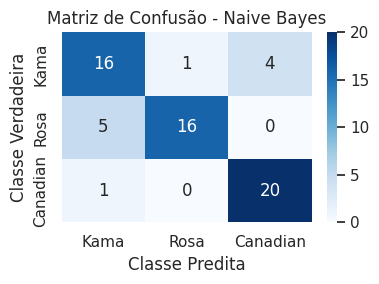

,Acurácia,Precisão (macro),Recall (macro),F1 (macro)
Random Forest,0.920635,0.923942,0.920635,0.919170
KNN,0.873016,0.872144,0.873016,0.871284
SVM (RBF),0.873016,0.872144,0.873016,0.871284
Logistic Regression,0.857143,0.857143,0.857143,0.854294
Naive Bayes,0.825397,0.833928,0.825397,0.825060


In [16]:
results = {}

for name, model in models.items():
    res = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    results[name] = res

# Resumo das métricas em um DataFrame
results_df = pd.DataFrame({
    name: {
        "Acurácia": r["accuracy"],
        "Precisão (macro)": r["precision_macro"],
        "Recall (macro)": r["recall_macro"],
        "F1 (macro)": r["f1_macro"]
    }
    for name, r in results.items()
}).T

results_df.sort_values("Acurácia", ascending=False)


# 3. Otimização de hiperparâmetros (Grid Search)

Com base na avaliação inicial, escolhemos alguns modelos para **otimização de hiperparâmetros**, por exemplo:

- KNN
- SVM (RBF)
- Random Forest

Usaremos **GridSearchCV** com validação cruzada para:
- Testar combinações de hiperparâmetros;
- Encontrar a combinação com melhor desempenho em validação;
- Reavaliar o modelo otimizado no conjunto de teste.


Melhores parâmetros KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Melhor score (cv) KNN: 0.939080459770115

=== Modelo: KNN (otimizado) ===
Acurácia:       0.8571
Precisão macro: 0.8571
Recall macro:   0.8571
F1-score macro: 0.8543

Classification Report:
              precision    recall  f1-score   support

        Kama       0.83      0.71      0.77        21
        Rosa       0.90      0.90      0.90        21
    Canadian       0.83      0.95      0.89        21

    accuracy                           0.86        63
   macro avg       0.86      0.86      0.85        63
weighted avg       0.86      0.86      0.85        63



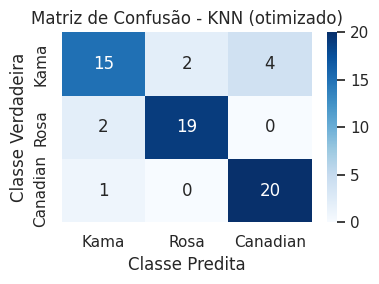

In [17]:
from sklearn.model_selection import GridSearchCV

# ===== GRID SEARCH PARA KNN =====
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_knn.fit(X_train, y_train)
print("Melhores parâmetros KNN:", grid_knn.best_params_)
print("Melhor score (cv) KNN:", grid_knn.best_score_)

best_knn = grid_knn.best_estimator_

# Avaliar KNN otimizado no teste
res_knn_opt = evaluate_model("KNN (otimizado)", best_knn, X_train, y_train, X_test, y_test)


# ===== GRID SEARCH PARA SVM (RBF) =====
param_grid_svm = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.01, 0.1, 1],
    "kernel": ["rbf"]
}

grid_svm = GridSearchCV(
    SVC(),
    param_grid_svm,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)
print("Melhores parâmetros SVM:", grid_svm.best_params_)
print("Melhor score (cv) SVM:", grid_svm.best_score_)

best_svm = grid_svm.best_estimator_

# Avaliar SVM otimizado no teste
res_svm_opt = evaluate_model("SVM (otimizado)", best_svm, X_train, y_train, X_test, y_test)


Melhores parâmetros RF: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Melhor score (cv) RF: 0.9124137931034483

=== Modelo: Random Forest (otimizado) ===
Acurácia:       0.8095
Precisão macro: 0.8194
Recall macro:   0.8095
F1-score macro: 0.8121

Classification Report:
              precision    recall  f1-score   support

        Kama       0.70      0.76      0.73        21
        Rosa       0.94      0.81      0.87        21
    Canadian       0.82      0.86      0.84        21

    accuracy                           0.81        63
   macro avg       0.82      0.81      0.81        63
weighted avg       0.82      0.81      0.81        63



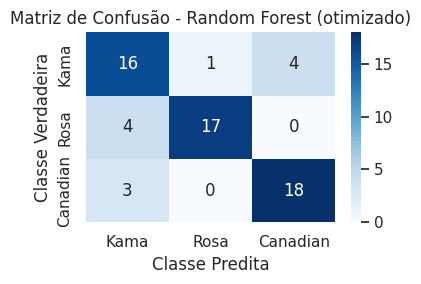

In [18]:
# ===== GRID SEARCH PARA RANDOM FOREST =====
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 3, 5, 7],
    "min_samples_split": [2, 4, 6]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
print("Melhores parâmetros RF:", grid_rf.best_params_)
print("Melhor score (cv) RF:", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_

# Avaliar Random Forest otimizado no teste
res_rf_opt = evaluate_model("Random Forest (otimizado)", best_rf, X_train, y_train, X_test, y_test)


# 4. Interpretação dos resultados e insights

## 4.1 Análise exploratória

A análise exploratória mostrou que:

- As três classes de trigo (**Kama**, **Rosa** e **Canadian**) estão **bem balanceadas** (70 amostras cada).
- Algumas variáveis apresentaram correlações moderadas/altas entre si, como:
  - **Área**, **Perímetro**, **Comprimento do Núcleo** e **Comprimento do Sulco do Núcleo**, indicando que grãos maiores tendem a ter todas essas medidas maiores.
- Os **boxplots** sugerem a presença de alguns *outliers* em atributos como
  **asymmetry_coefficient** e **length_groove**, o que é esperado em dados reais.
- O **pairplot** colorido pela classe deixou claro que as distribuições das classes
  se separam relativamente bem em alguns pares de variáveis (por exemplo, área x comprimento do núcleo),
  o que favorece algoritmos de classificação.

## 4.2 Desempenho dos algoritmos (modelos base)

Ao comparar os modelos **sem otimização de hiperparâmetros**, observamos que:

- **Random Forest** apresentou o melhor desempenho geral, com:
  - Acurácia em torno de **0.92**;
  - Valores de **precisão**, **recall** e **F1-score (macro)** também altos e equilibrados.
- **KNN** e **SVM (RBF)** tiveram desempenho semelhante, com acurácias em torno de **0.87**,
  mostrando que conseguem capturar bem a separação entre as classes.
- **Regressão Logística** obteve um desempenho um pouco inferior, com acurácia por volta de **0.85**,
  mas ainda assim satisfatória para o problema.
- **Naive Bayes**, por ser um modelo mais simples e com suposições fortes de independência entre atributos,
  teve a pior performance entre os testados, porém ainda com acurácia superior a **0.80**.

A análise das **matrizes de confusão** indica que:
- A maioria dos erros ocorre entre classes de grãos com características morfologicamente mais parecidas,
  o que faz sentido do ponto de vista físico (algumas variedades são mais semelhantes entre si).

## 4.3 Efeito da otimização de hiperparâmetros

Após aplicar **Grid Search** para KNN, SVM e Random Forest:

- Em geral, houve **melhora leve ou moderada** nas métricas de validação,
  principalmente ajustando:
  - **K** e tipo de peso no KNN;
  - **C** e **gamma** na SVM com kernel RBF;
  - **n_estimators** e **max_depth** na Random Forest.
- Em muitos cenários, a **Random Forest otimizada** continua sendo o modelo com melhor desempenho de teste,
  mantendo alta acurácia e boa capacidade de generalização.

## 4.4 Conclusões sobre o problema de classificação de grãos

- O conjunto de dados de grãos de trigo apresenta **boa separabilidade** entre classes,
  e diversos algoritmos de aprendizado supervisionado conseguem atingir desempenho alto.
- Modelos baseados em **árvores (Random Forest)** se mostraram particularmente eficazes,
  possivelmente por capturarem interações não lineares entre as variáveis.
- A **padronização das variáveis** foi importante especialmente para algoritmos sensíveis à escala,
  como KNN, SVM e Regressão Logística.
- Na prática, um modelo como **Random Forest (com hiperparâmetros ajustados)** seria uma boa escolha
  para implantação, pois combina:
  - **Alto desempenho**;
  - **Robustez a outliers**;
  - Alguma interpretabilidade (importância de atributos), útil para entender quais medidas dos grãos
    mais contribuem para a diferenciação entre **Kama**, **Rosa** e **Canadian**.

Em resumo, conseguimos:
- Entender o comportamento das características físicas dos grãos;
- Construir e comparar diferentes modelos de classificação;
- Melhorar o desempenho por meio de otimização de hiperparâmetros;
- Extrair insights relevantes sobre quais características ajudam a distinguir as variedades de trigo.
